# Gradient Boosting

## 1.Environment Setup

In [ ]:
import os
import random
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score

warnings.filterwarnings('ignore')

# Set seed to ensure consistent results between runs
SEED = 42
os.environ["PYTHONHASHSEED"] = str(SEED)
np.random.seed(SEED)
random.seed(SEED)
print(f"Seed: {SEED}")

Seed: 42


## 2.Data Processing

In [2]:
# https://drive.google.com/drive/folders/1cMoqIDEgGYDVzv8B7cKp3csxujQ4OFp7?usp=drive_link
!gdown --folder 1cMoqIDEgGYDVzv8B7cKp3csxujQ4OFp7

Retrieving folder contents
Error:

	Cannot retrieve the folder information from the link. You may need to
	change the permission to 'Anyone with the link', or have had many
	accesses. Check FAQ in https://github.com/wkentaro/gdown?tab=readme-
	ov-file#faq.

To report issues, please visit https://github.com/wkentaro/gdown/issues.


In [3]:
def read_csv(file_path):
    df = pd.read_csv(file_path)
    display(df.head())

    X = df.drop('target', axis=1)
    y = df['target']
    display(y.value_counts())

    print("Shape df: ", df.shape)
    print("Shape X: ", X.shape)
    print("Shape y: ", y.shape)

    return X, y

### 2.1 Original Dataset

In [ ]:
X_train, y_train = read_csv('dataset_v3/raw_train.csv')
X_val, y_val = read_csv('dataset_v3/raw_val.csv')
X_test, y_test = read_csv('dataset_v3/raw_test.csv')

### 2.2 Feature Engineering Dataset

In [ ]:
X_fe_train, y_fe_train = read_csv('dataset_v3/fe_train.csv')
X_fe_val, y_fe_val = read_csv('dataset_v3/fe_val.csv')
X_fe_test, y_fe_test = read_csv('dataset_v3/fe_test.csv')

,thal_3.0,thal_7.0,cp_4.0,ca_0.0,exang_1.0,exang_0.0,oldpeak,slope_1.0,chol,slope_2.0,thalach,hr_ratio,sex_1.0,target
0,0.0,1.0,1.0,1.0,0.0,1.0,-0.445445,0.0,0.458139,1.0,0.708371,0.726265,1.0,1
1,1.0,0.0,0.0,1.0,0.0,1.0,-0.891627,1.0,0.230598,0.0,0.222495,-0.054469,1.0,0
2,1.0,0.0,0.0,0.0,1.0,0.0,-0.891627,1.0,0.723605,0.0,0.399178,0.099522,0.0,0
3,0.0,1.0,0.0,1.0,0.0,1.0,-0.891627,1.0,1.121803,0.0,0.266666,0.031766,1.0,0
4,0.0,1.0,1.0,1.0,1.0,0.0,-0.713154,0.0,-0.167601,1.0,-1.190962,-0.859761,0.0,1


,count
target,
0,131
1,111


Shape df:  (242, 14)
Shape X:  (242, 13)
Shape y:  (242,)


,thal_3.0,thal_7.0,cp_4.0,ca_0.0,exang_1.0,exang_0.0,oldpeak,slope_1.0,chol,slope_2.0,thalach,hr_ratio,sex_1.0,target
0,1.0,0.0,1.0,1.0,1.0,0.0,-0.713154,0.0,-0.262410,1.0,0.089984,0.628019,0.0,0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.250048,0.0,1.368307,1.0,-1.809349,-1.592443,1.0,1
2,0.0,1.0,0.0,1.0,0.0,1.0,0.536156,1.0,-0.338257,0.0,0.664201,0.235034,1.0,0
3,1.0,0.0,0.0,1.0,0.0,1.0,-0.891627,1.0,0.040979,0.0,0.973394,-0.161823,0.0,0
4,0.0,1.0,1.0,1.0,0.0,1.0,-0.445445,0.0,-0.300333,1.0,0.487519,-0.163464,1.0,0


,count
target,
0,16
1,14


Shape df:  (30, 14)
Shape X:  (30, 13)
Shape y:  (30,)


,thal_3.0,thal_7.0,cp_4.0,ca_0.0,exang_1.0,exang_0.0,oldpeak,slope_1.0,chol,slope_2.0,thalach,hr_ratio,sex_1.0,target
0,0.0,1.0,1.0,0.0,1.0,0.0,1.071575,0.0,-0.641646,1.0,-0.837597,-0.736915,1.0,1
1,1.0,0.0,0.0,1.0,0.0,1.0,-0.891627,1.0,-1.286348,0.0,1.061736,2.749978,1.0,0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.714629,0.0,-0.357219,1.0,-0.175039,-0.619566,1.0,0
3,1.0,0.0,0.0,1.0,0.0,1.0,-0.445445,1.0,0.116827,0.0,-0.042528,0.071622,0.0,0
4,0.0,1.0,0.0,1.0,0.0,1.0,-0.177735,0.0,-0.186562,0.0,1.945146,2.141882,1.0,0


,count
target,
0,17
1,14


Shape df:  (31, 14)
Shape X:  (31, 13)
Shape y:  (31,)


### 2.3 Original + DT Dataset

In [ ]:
X_dt_train, y_dt_train = read_csv('dataset_v3/dt_train.csv')
X_dt_val, y_dt_val = read_csv('dataset_v3/dt_val.csv')
X_dt_test, y_dt_test = read_csv('dataset_v3/dt_test.csv')

,thal,cp,ca,oldpeak,chol,age,thalach,sex,slope,exang,target
0,1.0,1.000000,0.000000,-0.445445,0.458139,-0.729485,0.708371,1.0,0.5,0.0,1
1,0.0,0.333333,0.000000,-0.891627,0.230598,0.050166,0.222495,1.0,0.0,0.0,0
2,0.0,0.333333,0.333333,-0.891627,0.723605,-0.061212,0.399178,0.0,0.0,1.0,0
3,1.0,0.333333,0.000000,-0.891627,1.121803,-0.061212,0.266666,1.0,0.0,0.0,0
4,1.0,1.000000,0.000000,-0.713154,-0.167601,0.272924,-1.190962,0.0,0.5,1.0,1


,count
target,
0,131
1,111


Shape df:  (242, 11)
Shape X:  (242, 10)
Shape y:  (242,)


,thal,cp,ca,oldpeak,chol,age,thalach,sex,slope,exang,target
0,0.0,1.000000,0.0,-0.713154,-0.262410,-1.063621,0.089984,0.0,0.5,1.0,0
1,0.0,1.000000,1.0,1.250048,1.368307,1.720848,-1.809349,1.0,0.5,0.0,1
2,1.0,0.666667,0.0,0.536156,-0.338257,-0.061212,0.664201,1.0,0.0,0.0,0
3,0.0,0.666667,0.0,-0.891627,0.040979,0.941197,0.973394,0.0,0.0,0.0,0
4,1.0,1.000000,0.0,-0.445445,-0.300333,0.495681,0.487519,1.0,0.5,0.0,0


,count
target,
0,16
1,14


Shape df:  (30, 11)
Shape X:  (30, 10)
Shape y:  (30,)


,thal,cp,ca,oldpeak,chol,age,thalach,sex,slope,exang,target
0,1.0,1.000000,1.0,1.071575,-0.641646,0.384303,-0.837597,1.0,0.5,1.0,1
1,0.0,0.000000,0.0,-0.891627,-1.286348,-2.288787,1.061736,1.0,0.0,0.0,0
2,1.0,0.666667,1.0,0.714629,-0.357219,0.829818,-0.175039,1.0,0.5,0.0,0
3,0.0,0.666667,0.0,-0.445445,0.116827,-0.395349,-0.042528,0.0,0.0,0.0,0
4,1.0,0.666667,0.0,-0.177735,-0.186562,-1.397757,1.945146,1.0,1.0,0.0,0


,count
target,
0,17
1,14


Shape df:  (31, 11)
Shape X:  (31, 10)
Shape y:  (31,)


### 2.4 Feature Engineering + DT Dataset

In [ ]:
X_fe_dt_train, y_fe_dt_train = read_csv('dataset_v3/fe_dt_train.csv')
X_fe_dt_val, y_fe_dt_val = read_csv('dataset_v3/fe_dt_val.csv')
X_fe_dt_test, y_fe_dt_test = read_csv('dataset_v3/fe_dt_test.csv')

,thal_3.0,cp_4.0,ca_0.0,chol_per_age,hr_ratio,oldpeak,chol,age,exang_0.0,cp_3.0,target
0,0.0,1.0,1.0,0.952258,0.726265,-0.445445,0.458139,-0.729485,1.0,0.0,1
1,1.0,0.0,1.0,0.082082,-0.054469,-0.891627,0.230598,0.050166,1.0,0.0,0
2,1.0,0.0,0.0,0.606839,0.099522,-0.891627,0.723605,-0.061212,0.0,0.0,0
3,0.0,0.0,1.0,0.965051,0.031766,-0.891627,1.121803,-0.061212,1.0,0.0,0
4,0.0,1.0,1.0,-0.411237,-0.859761,-0.713154,-0.167601,0.272924,0.0,0.0,1


,count
target,
0,131
1,111


Shape df:  (242, 11)
Shape X:  (242, 10)
Shape y:  (242,)


,thal_3.0,cp_4.0,ca_0.0,chol_per_age,hr_ratio,oldpeak,chol,age,exang_0.0,cp_3.0,target
0,1.0,1.0,1.0,0.524962,0.628019,-0.713154,-0.262410,-1.063621,0.0,0.0,0
1,1.0,1.0,0.0,-0.068646,-1.592443,1.250048,1.368307,1.720848,1.0,0.0,1
2,0.0,0.0,1.0,-0.348393,0.235034,0.536156,-0.338257,-0.061212,1.0,1.0,0
3,1.0,0.0,1.0,-0.621316,-0.161823,-0.891627,0.040979,0.941197,1.0,1.0,0
4,0.0,1.0,1.0,-0.652540,-0.163464,-0.445445,-0.300333,0.495681,1.0,0.0,0


,count
target,
0,16
1,14


Shape df:  (30, 11)
Shape X:  (30, 10)
Shape y:  (30,)


,thal_3.0,cp_4.0,ca_0.0,chol_per_age,hr_ratio,oldpeak,chol,age,exang_0.0,cp_3.0,target
0,0.0,1.0,0.0,-0.875417,-0.736915,1.071575,-0.641646,0.384303,0.0,0.0,1
1,1.0,0.0,1.0,0.624900,2.749978,-0.891627,-1.286348,-2.288787,1.0,0.0,0
2,0.0,0.0,0.0,-0.873880,-0.619566,0.714629,-0.357219,0.829818,1.0,1.0,0
3,1.0,0.0,1.0,0.317862,0.071622,-0.445445,0.116827,-0.395349,1.0,1.0,0
4,0.0,0.0,1.0,0.957741,2.141882,-0.177735,-0.186562,-1.397757,1.0,1.0,0


,count
target,
0,17
1,14


Shape df:  (31, 11)
Shape X:  (31, 10)
Shape y:  (31,)


## 3.Gradient Boost (GB)

In [ ]:
# ==== 1) Find optimize hyperparameters by Cross-Validation ====
def find_optimal_gb(
    X_train, y_train,
    n_estimators_range=range(50, 501, 50),
    cv_splits=3
):
    cv = StratifiedKFold(n_splits=cv_splits,
                         shuffle=True, random_state=SEED)
    scores = []

    for n in n_estimators_range:
        gb = GradientBoostingClassifier(
            n_estimators=n, learning_rate=0.1,
            max_depth=5, subsample=1.0, random_state=SEED
        )
        cv_score = cross_val_score(
            gb, X_train, y_train,
            cv=cv, scoring='accuracy', n_jobs=-1
        )
        scores.append(cv_score.mean())

    plt.figure(figsize=(10, 6))
    plt.plot(list(n_estimators_range), scores, 'bo-')
    plt.title(
        f'Choose the optimal n_estimators for Gradient Boosting (CV={cv_splits}-fold)')
    plt.xlabel('n_estimators')
    plt.ylabel('Cross-Validation Accuracy')
    plt.grid(True)
    plt.show()

    best_n = list(n_estimators_range)[int(np.argmax(scores))]
    print(f'Optimal n_estimators (CV): {best_n}')

    best_model = GradientBoostingClassifier(
        n_estimators=best_n,
        learning_rate=0.1,
        max_depth=5,
        subsample=1.0,
        random_state=SEED
    )
    best_model.fit(X_train, y_train)
    return best_model, best_n, max(scores)

def evaluate_val_gb(X_train, y_train, X_val, y_val,
                    n_estimators_range=range(50, 501, 50),
                    cv_splits=3):
    print('Find optimal n_estimators for Gradient Boosting...')
    gb_model, best_n, cv_acc = find_optimal_gb(
        X_train, y_train,
        n_estimators_range=n_estimators_range,
        cv_splits=cv_splits
    )

    val_pred = gb_model.predict(X_val)
    val_acc = accuracy_score(y_val, val_pred)
    print(f'\nGradient Boosting accuracy on validation set: {val_acc:.4f}')
    print('Classification Report:')
    print(classification_report(y_val, val_pred))
    return gb_model, val_acc, {'n_estimators': best_n}

def evaluate_test_gb(gb_model, X_test, y_test):
    test_pred = gb_model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    print(f'\nGradient Boosting accuracy on test set: {test_acc:.4f}')
    print('Classification Report:')
    print(classification_report(y_test, test_pred))
    return test_acc


### 3.1 GB on Original Dataset

Tìm n_estimators tối ưu cho Gradient Boosting...


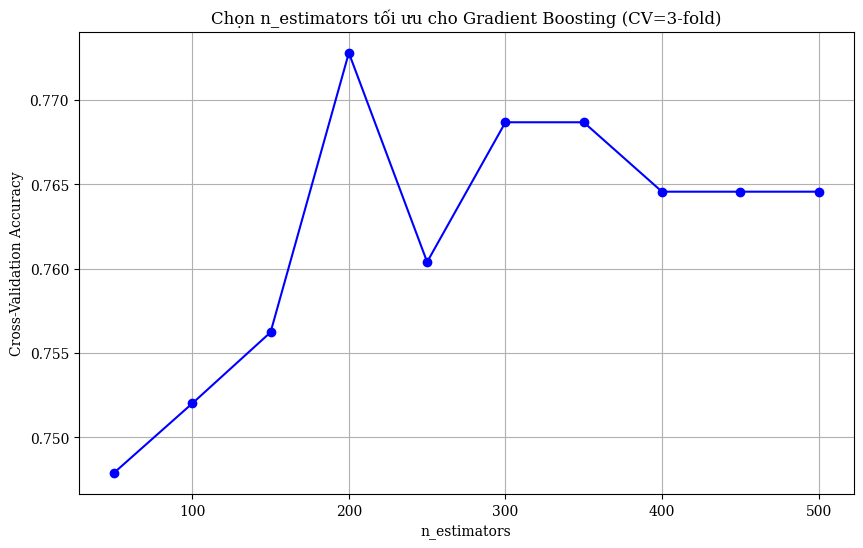

n_estimators tối ưu (CV): 200

Độ chính xác GB trên tập validation: 0.8667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        16
           1       0.78      1.00      0.88        14

    accuracy                           0.87        30
   macro avg       0.89      0.88      0.87        30
weighted avg       0.90      0.87      0.87        30


Độ chính xác GB trên tập test: 0.8065
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.75      0.86      0.80        14

    accuracy                           0.81        31
   macro avg       0.81      0.81      0.81        31
weighted avg       0.81      0.81      0.81        31



In [ ]:
# 1) Find & train the best model on X_train
gb_model, val_acc, best_params = evaluate_val_gb(
    X_train, y_train, X_val, y_val
)

# 2) Evaluate test
test_acc = evaluate_test_gb(gb_model, X_test, y_test)

### 3.2 GB on Feature Engineering Dataset

Tìm n_estimators tối ưu cho Gradient Boosting...


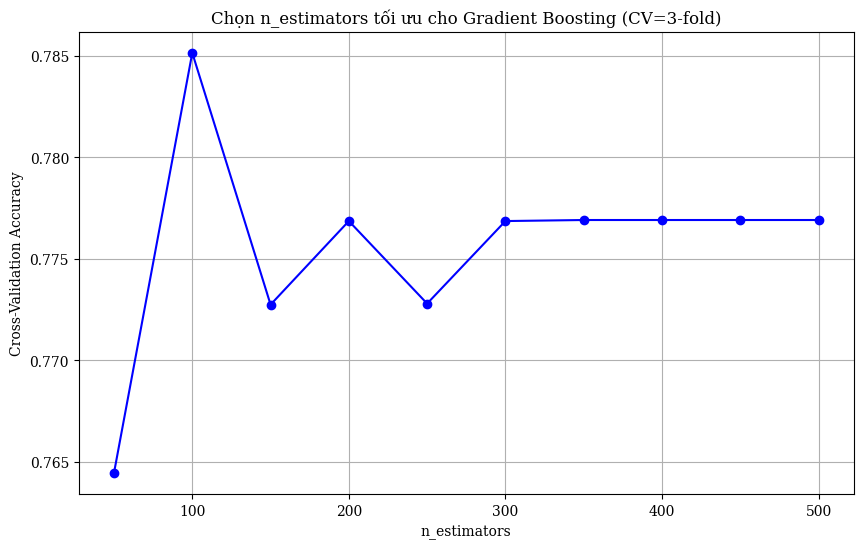

n_estimators tối ưu (CV): 100

Độ chính xác GB trên tập validation: 0.8333
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.80      0.86      0.83        14

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.84      0.83      0.83        30


Độ chính xác GB trên tập test: 0.8065
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.79      0.79      0.79        14

    accuracy                           0.81        31
   macro avg       0.80      0.80      0.80        31
weighted avg       0.81      0.81      0.81        31



In [ ]:
# 1) Find & train the best model on X_train
gb_model, val_fe_acc, best_params = evaluate_val_gb(
    X_fe_train, y_fe_train, X_fe_val, y_fe_val
)

# 2) Evaluate test
test_fe_acc = evaluate_test_gb(gb_model, X_fe_test, y_fe_test)

### 3.3 GB on Original DT Dataset

Tìm n_estimators tối ưu cho Gradient Boosting...


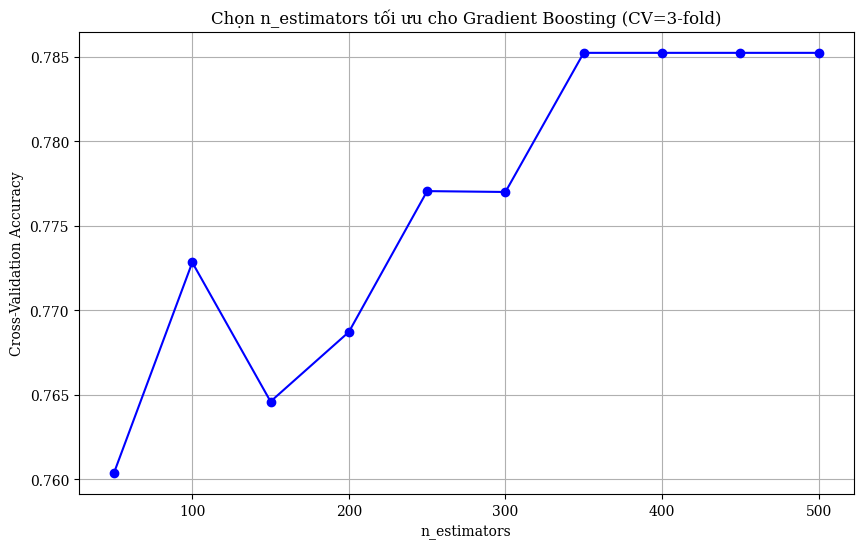

n_estimators tối ưu (CV): 350

Độ chính xác GB trên tập validation: 0.8667
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.81      0.93      0.87        14

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30


Độ chính xác GB trên tập test: 0.8387
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.80      0.86      0.83        14

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [ ]:
# 1) Find & train the best model on X_train
gb_model, val_dt_acc, best_params = evaluate_val_gb(
    X_dt_train, y_dt_train, X_dt_val, y_dt_val
)

# 2) Evaluate test
test_dt_acc = evaluate_test_gb(gb_model, X_dt_test, y_dt_test)

### 3.4 GB on Feature Engineering DT Dataset

Tìm n_estimators tối ưu cho Gradient Boosting...


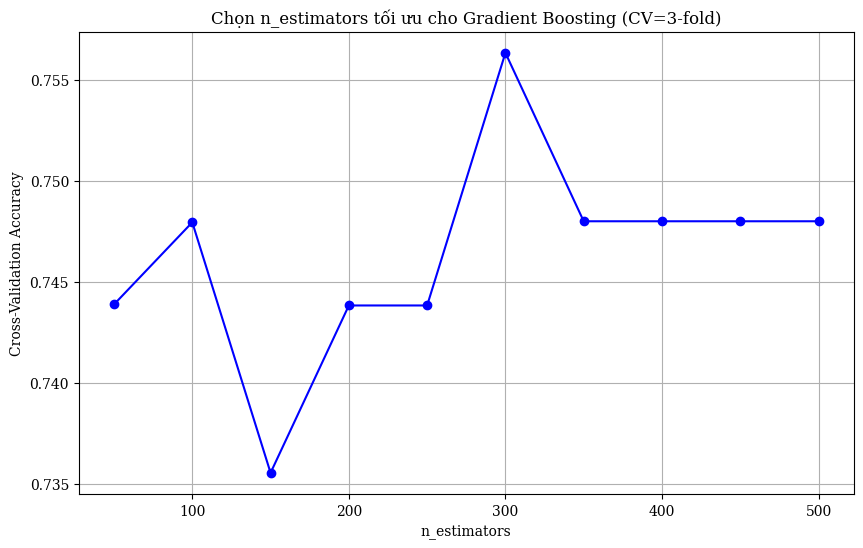

n_estimators tối ưu (CV): 300

Độ chính xác GB trên tập validation: 0.9333
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.93      0.93      0.93        14

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Độ chính xác GB trên tập test: 0.8065
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.79      0.79      0.79        14

    accuracy                           0.81        31
   macro avg       0.80      0.80      0.80        31
weighted avg       0.81      0.81      0.81        31



In [ ]:
# 1) Find & train the best model on X_train
gb_model, val_fe_dt_acc, best_params = evaluate_val_gb(
    X_fe_dt_train, y_fe_dt_train, X_fe_dt_val, y_fe_dt_val,
)

# 2) Evaluate test
test_fe_dt_acc = evaluate_test_gb(gb_model, X_fe_dt_test, y_fe_dt_test)

## 4.Result Visualization

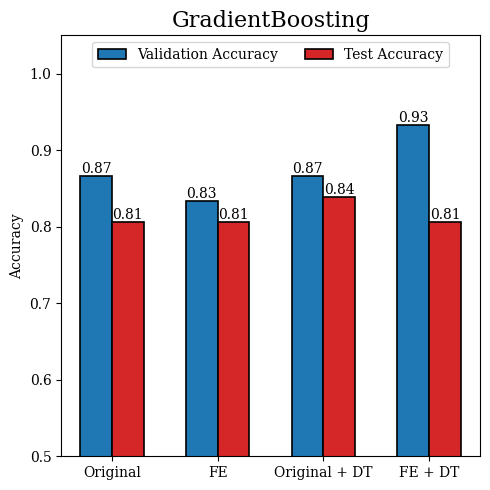

In [ ]:
plt.rcParams['font.family'] = 'Serif'

labels = ['Original', 'FE', 'Original + DT', "FE + DT"]
val_accs = [val_acc, val_fe_acc, val_dt_acc, val_fe_dt_acc]
test_accs = [test_acc, test_fe_acc, test_dt_acc, test_fe_dt_acc]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(5, 5))

rects1 = ax.bar(x - width/2, val_accs,  width,
                label='Validation Accuracy',
                color='tab:blue', edgecolor='black', linewidth=1.2)
rects2 = ax.bar(x + width/2, test_accs, width,
                label='Test Accuracy',
                color='tab:red', edgecolor='black', linewidth=1.2)

ax.set_ylim(0.5, 1.05)
ax.set_ylabel('Accuracy')
ax.set_title('GradientBoosting', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(ncol=2, loc="upper center")

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.annotate(f'{h:.2f}', xy=(rect.get_x()+rect.get_width()/2, h),
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig.savefig("GB_accuracy_comparison.png", dpi=300, bbox_inches="tight")
fig.savefig("GB_accuracy_comparison.pdf", bbox_inches="tight")
plt.show()
